In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter

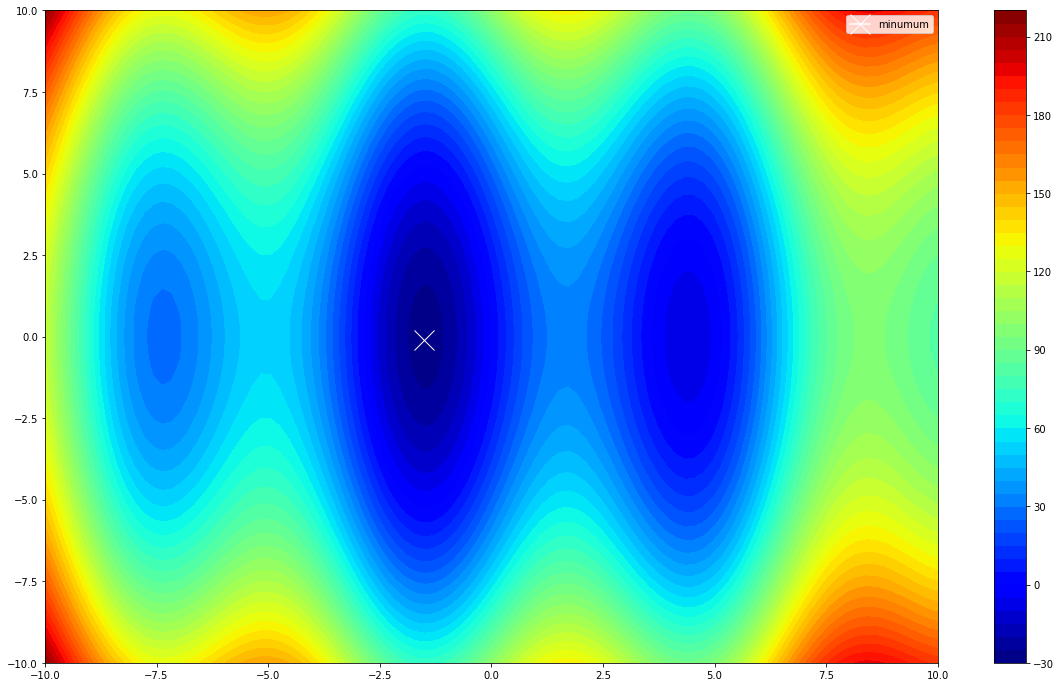

In [2]:
# Set the boundaries of the landscape
x = np.linspace(-10,10, 100)
y = np.linspace(-10,10, 100)

# Define the lossf function
def objective_function(x, y):
    return x**2 + y**2 + 30*np.sin(x)

# Calculate the loss at each (x,y) in the landscape
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

# Find (x,y) of the minimum of the loss
x_min = X.ravel()[np.argmin(Z)]
y_min = Y.ravel()[np.argmin(Z)]

# Plot loss and display location of the minimum
plt.figure(figsize =(20,12))
plt.contourf(X, Y, Z, 50, cmap='jet')
plt.plot([x_min],[y_min], marker = 'x', color = 'white', markersize = 20, label ='minumum')
plt.legend()
plt.colorbar();

In [3]:
# Define the particle swarm optimization function

def particle_swarm(n_iterations, w, c1, c2, 
                   n_particles, x, y, loss_function): 
    
    # Calculate Z
    X, Y = np.meshgrid(x, y)
    Z = loss_function(X, Y)
    
    # Find the location of the global minimum
    x_min = X.ravel()[np.argmin(Z)]
    y_min = Y.ravel()[np.argmin(Z)]
    min_tuples = (x_min, y_min)
    print('min location: ', min_tuples)
    
    # Empty dictionary to store particle information
    particle_positions = {}
    
    # Get the range of x and y
    x_lim_min, x_lim_max = np.min(x), np.max(x)
    y_lim_min, y_lim_max = np.min(y), np.max(y)
    
    # Random initialization of particles' starting position
    particles_x = np.random.rand(n_particles) * (x_lim_max - x_lim_min) - x_lim_max
    particles_y = np.random.rand(n_particles) * (y_lim_max - y_lim_min) - y_lim_max
    start_position_particles = np.concatenate([particles_x.reshape(-1,1), particles_y.reshape(-1,1)], axis = 1)

    # Initial random velocity of the particles
    start_velocity = np.random.normal(size = (n_particles, 2)) *0.5

    # Initially, the best individual position is the starting position
    best_personal_position = start_position_particles
    
    # Calculate best group position 
    loss = loss_function(start_position_particles[:,0], start_position_particles[:,1])
    best_group_location = start_position_particles[np.argmin(loss),:]
    
    # Storing start position, best_personal_position, initial velocity, best_group_location
    particle_positions[0] = [start_position_particles, 
                             best_personal_position, 
                             start_velocity, 
                             best_group_location]
    
    # Main loop 
    for iteration in range(n_iterations):
        
        # Give random value to  r1 and r2
        r1, r2 = np.random.rand(2)
        
        # Extract previous iteration values
        current_position = particle_positions[iteration][0]
        current_velocity = particle_positions[iteration][2]
        current_best_personal_position = particle_positions[iteration][1]
        current_best_group_position = particle_positions[iteration][3]
        
        # Calculate velocity at next iteration
        V_next = w * current_velocity + \
        c1*r1*(current_best_personal_position - current_position) + \
        c2*r2*(current_best_group_position - current_position)
        
        # Calculate position at next iteration
        x_next = current_position + V_next
        
        # Calculate current and next position loss
        previous_loss = loss_function(current_position[:,0], current_position[:,1])
        next_loss = loss_function(x_next[:,0], x_next[:,1])
        losses = np.concatenate([previous_loss,next_loss])
        
        # Update best personal position 
        update_personal_best_indexes = np.argmin(losses.reshape(2,n_particles), axis =0)
        previous_next_position_concat  = np.concatenate([np.expand_dims(current_position, axis = 1), 
                              np.expand_dims(x_next, axis = 1)], axis =1)
        
        next_best_personal_position = previous_next_position_concat[np.arange(n_particles),update_personal_best_indexes,:]
        
        # Calculate current and next best group position
        current_best_group_location_loss = loss_function(current_best_group_position[0], 
                                                         current_best_group_position[1])
        next_best_group_location = x_next[np.argmin(next_loss),:]
        next_best_group_location_loss = np.min(next_loss)
        # Update best group position
        if current_best_group_location_loss < next_best_group_location_loss:
            next_best_group_location = current_best_group_position
            
        # Storing new values in the dictionary  
        particle_positions[iteration + 1] = [x_next, 
                                             next_best_personal_position,
                                             V_next,
                                             next_best_group_location]
    
    # Plot location and velocity of particles at 6 iterations
    delta = round((n_iterations-1) / 5 )
    indexes_to_plot = list(range(0, n_iterations, delta ))
    indexes_to_plot.append(n_iterations)
    cols = 2
    rows = 3

    # Create the figure
    plt.figure(figsize =(8*cols,6*rows))
    
    # For loop for the subplots 
    for num, ind in enumerate(indexes_to_plot):
        current_position = particle_positions[ind][0]
        current_position_velocity = particle_positions[ind][2]
        plt.subplot(rows,cols , num+1)
        plt.title(f"Iteration: {ind}")
        # Plot the contours
        plt.contourf(X, Y, Z, 50, cmap='jet')
        # Plot the particles' location 
        plt.scatter(current_position[:,0], current_position[:,1], color = 'red')    
        # Plot the particles' velocity
        plt.quiver(current_position[:,0].ravel(), 
                   current_position[:,1].ravel(), 
                   current_position_velocity[:,0].ravel(), 
                   current_position_velocity[:,1].ravel(), 
                   color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
        # Display the location of the minimum
        plt.plot(x_min, y_min, marker = 'x', color = 'white', markersize = 10, label ='minumum')
        plt.xlim([x_lim_min, x_lim_max])
        plt.ylim([y_lim_min, y_lim_max])
        plt.colorbar()
        plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Return the dictionary with the particles' history
    return particle_positions


min location:  (-1.5151515151515156, -0.10101010101010033)


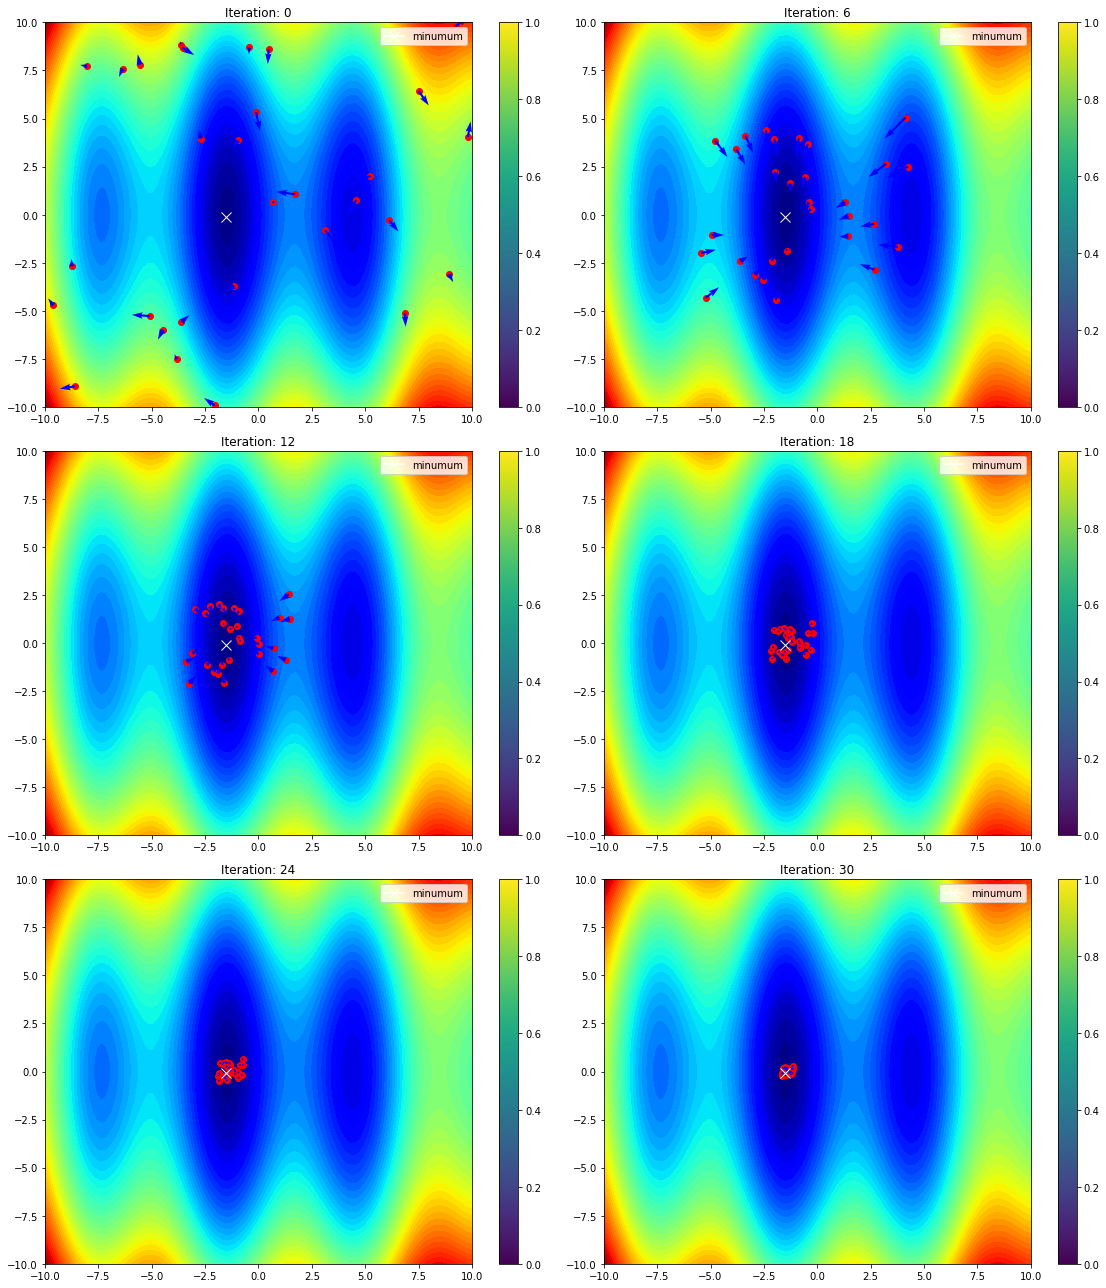

[-1.47827866  0.10823525]


In [4]:
# Run the algorithm
n_iterations = 30
n_particles = 30

particle_positions = particle_swarm(n_iterations = 30, 
                                    w = 0.5, 
                                    c1 = 0.1, c2 =0.1,
                                    n_particles = 30,
                                    x = x, y = y, 
                                    loss_function = objective_function)

# Print the FINAL global optimal location
print(particle_positions[30][3])

MovieWriter imagemagick unavailable; using Pillow instead.


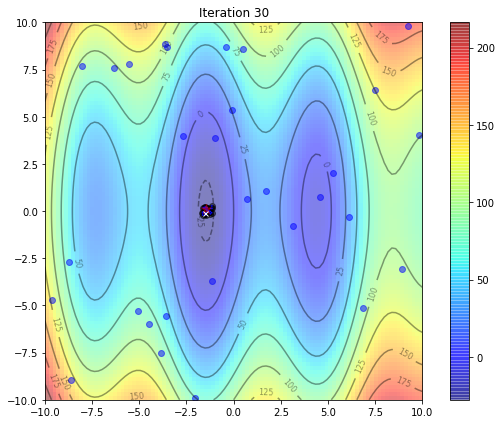

In [5]:
## Create an animation of the mimimum search progress
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)
    
# Find the location of the global minimum
x_min = X.ravel()[np.argmin(Z)]
y_min = Y.ravel()[np.argmin(Z)]

# Get the initial values
Xp = particle_positions[0][0]
X_best_personal = particle_positions[0][1]
V = particle_positions[0][2]
global_best_x = particle_positions[0][3]

# Creat the contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', cmap='jet', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(X, Y, Z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
personal_best_plot = ax.scatter(X_best_personal[:,0], X_best_personal[:,1], marker='o', color='black', alpha=0.5)
particle_plot = ax.scatter(X[:,0], X[:,1], marker='o', color='blue', alpha=0.5)
particle_velocity = ax.quiver(Xp[:,0], Xp[:,1], V[:,0], V[:,1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
global_best_plot = plt.scatter([global_best_x[0]], [global_best_x[1]], marker='*', s=100, color='red', alpha=0.4)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

def animate(i):
    title = 'Iteration {:02d}'.format(i)
    ax.set_title(title)
    X = particle_positions[i][0]
    X_best_personal = particle_positions[i][1]
    V = particle_positions[i][2]
    global_best_x = particle_positions[i][3]
    
    # Update 
    particle_plot.set_offsets(Xp)
    personal_best_plot.set_offsets(X_best_personal)
    particle_velocity.set_offsets(X)
    particle_velocity.set_UVC(V[:,0], V[:,1])
    global_best_plot.set_offsets(global_best_x.reshape(1,-1))
    
    return ax, personal_best_plot, particle_plot, particle_velocity, global_best_plot


anim = FuncAnimation(fig, animate, frames=list(range(1, n_iterations+1)), 
                     interval=750, blit=False, repeat=True)

anim.save("PSO_result.gif", dpi=120, writer="imagemagick")
